This is an example of gradient descent algorithm to optimize a function f(x). The specific function being optimized is f(x) = 1*x^4 -1*x^3 - 12*x^2 - 15*x + 5. The function g(x) represents the gradient of the function f(x).

The algorithm starts with an initial guess for x, and then iteratively updates the value of x using the gradient of the function multiplied by a learning rate alpha. The learning rate is a hyperparameter that controls the step size of the update.

In this example, the algorithm runs for 20 iterations and the value of x and f(x) is stored in x_hist and fx_hist, respectively. Finally, the function f(x) is plotted over a range of values for x, and the path taken by the algorithm is plotted in red.

The resulting plot shows the optimization path taken by the gradient descent algorithm, as it tries to minimize the function f(x). The algorithm converges to a local minimum at x = 2.25.







x =  -1.4448006997496143 f(x) =  8.99601320417747


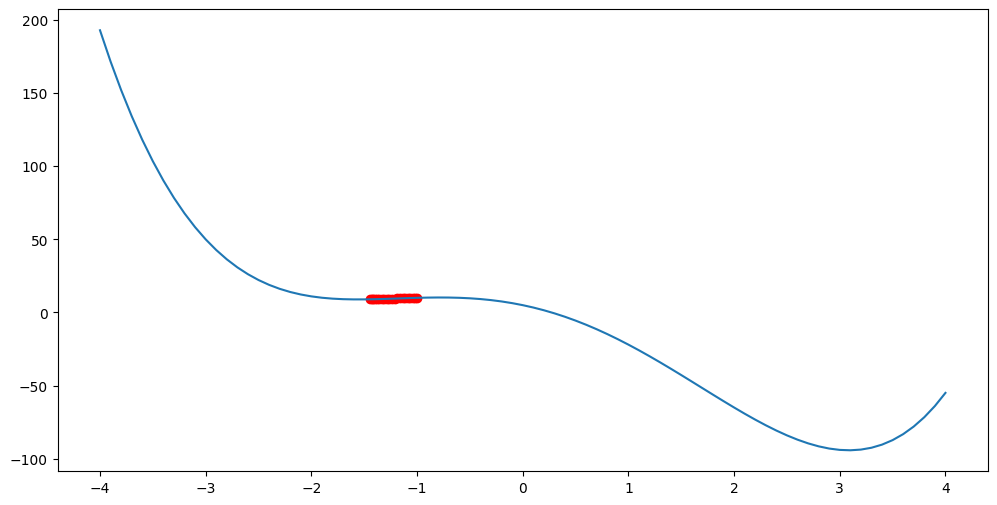

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# # The function to be optimized
# def f(x):
#     return x**2 -6*x + 9

# # Gradient
# def g(x):
#     return 2*x - 6

# The function to be optimized
def f(x):
    return 1*x**4 -1*x**3 - 12*x**2 - 15*x + 5

# Gradient
def g(x):
    return 4*x**3 -3*x**2 -24*x - 15

alpha = 0.01

x = -1
x_hist = np.array(x)
fx_hist = np.array(f(x))
for i in range(20): 
    x = x - alpha*g(x)
    x_hist = np.append(x_hist, x)
    fx_hist = np.append(fx_hist, f(x))

print('x = ', x, 'f(x) = ', f(x))
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(1,1,1)
delta = 0.1
x_ = np.arange(-4, 4 + delta, delta)
ax.plot(x_, f(x_))
ax.scatter(x_hist, fx_hist, c='r')

 This is a simple implementation of a linear regression model using stochastic gradient descent (SGD) for either the CIFAR10 or MNIST datasets. The code is written in Python and uses the TensorFlow and Keras libraries.

In [2]:
# Loading packages and data
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10, mnist

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train -> ", x_train.shape)


#The code then proceeds to preprocess the data. 
# The x_train and x_test images are reshaped to be of size (Ntr, Din), where Ntr is the number of training examples and Din is the input 
# dimensionality. For CIFAR10, Din is 3072, while for MNIST, Din is 784. 
# The y_train and y_test labels are converted to categorical using the to_categorical() function from keras.utils

Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
x_train = x_train[range(Ntr), :]
x_test = x_test[range(Nte), :]
y_train = y_train[range(Ntr)]
y_test = y_test[range(Nte)]

K = len(np.unique(y_train)) # 10
#converts a class vector (integers) to a binary class matrix.
#Each row will have a 1 in the column corresponding to the label, and 0s in all other columns. 
# For example, the class label 1 will be represented as [0, 1, 0].
y_train = tf.keras.utils.to_categorical(y_train, num_classes = K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = K)


x_train = np.reshape(x_train, (Ntr, Din))
x_test = np.reshape(x_test, (Nte, Din))
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)
#The x_train and x_test images are then normalized to have values between 0 and 1 using x_train /= 255. and x_test /= 255.
x_train /= 255.
x_test /= 255.


ModuleNotFoundError: No module named 'tensorflow'

In [14]:
# Utility function for diaplaying
def display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim = True):
    plt.plot(loss_history)


     # For diapaying the weights matrix w as an image. 32*32*3 assumption is there
    if showim:
        f, axarr = plt.subplots(2, 5)
        f.set_size_inches(16, 6)        
        for i in range(10):
            img = w[:, i].reshape(32, 32, 3)# CIFAR10
            # img = w1[:, i].reshape(28, 28)# MNIST    
            img = (img - np.amin(img))/(np.amax(img) - np.amin(img))
            axarr[i//5, i%5].imshow(img)
        plt.show()

    train_acc = np.mean(np.abs(np.argmax(y_train, axis=1) == np.argmax(y_train_pred, axis=1)))
    print("train_acc = ", train_acc)

    test_acc = np.mean(np.abs(np.argmax(y_test, axis=1) == np.argmax(y_test_pred, axis=1)))
    print("test_acc = ", test_acc)

In [15]:
std = 1e-5
#The initial weights and biases are defined here. 
# The weights matrix w is of size (Din, K), where K is the number of classes (10 for CIFAR10 and 10 for MNIST). 
# The bias vector b is of size K and initialized to be all zeros.
w = std*np.random.randn(Din, K)
b = np.zeros(K)
lr = 1e-3
lr_decay = 0.1
epochs = 11
batch_size = 500
loss_history = []
rng = np.random.default_rng(seed=0)
for e in range(epochs):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    for batch in range(Ntr//batch_size):
        batch_indices = indices[batch*batch_size:(batch+1)*batch_size]
        x = x_train[batch_indices]
        y = y_train[batch_indices]
         
        
        # Forward pass
        y_pred = x.dot(w) + b
        loss = 1./batch_size*np.square(y_pred - y).sum()
        loss_history.append(loss)   
        # Backward pass (The backward pass is performed next, which computes the gradients of the loss with respect to the weights and biases.)
        dy_pred = 1./batch_size*2.0*(y_pred - y)
        dw = x.T.dot(dy_pred)
        db = dy_pred.sum(axis=0)*1
        # The weights and biases update using the SGD update rule
        w = w - lr*dw
        b = b - lr*db

    if e % 5 == 0:
        print('Iteration %d / %d: loss %f'%(e, epochs, loss))
    if e % 10 == 0:
        lr *=  lr_decay

Iteration 0 / 11: loss 0.839534
Iteration 5 / 11: loss 0.824998
Iteration 10 / 11: loss 0.820589


Example learned weights at the end of learning for CIFAR-10. Note that, for example, the ship template contains a lot of blue pixels as expected. This template will therefore give a high score once it is matched against images of ships on the ocean with an inner product

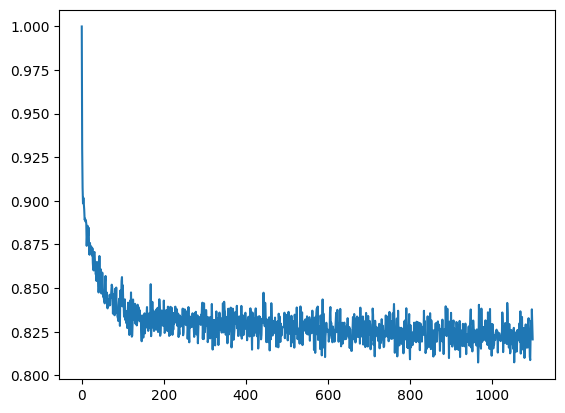

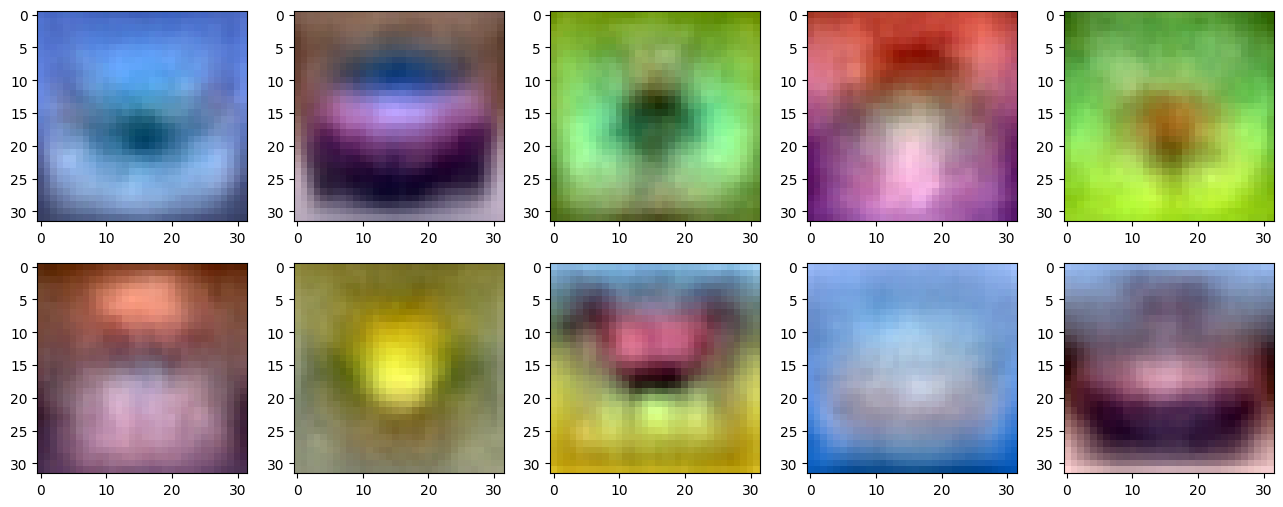

train_acc =  0.35874
test_acc =  0.3564


In [16]:
y_train_pred = x_train.dot(w) + b
y_test_pred = x_test.dot(w) + b
display(y_train, y_test, y_train_pred, y_test_pred, loss_history, w, showim = True) 

